<a href="https://colab.research.google.com/github/Tejassingh2004/netflix-eda-analysis/blob/main/Copy_of_netflix_eda_colab_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix EDA & Modeling — Colab-Ready Mini Project 🎬

This notebook performs **Exploratory Data Analysis (EDA)**, visualizations, and a simple **Machine Learning** model to predict whether a Netflix title is a *Movie* or a *TV Show*.

✅ **Colab Instructions:**
1. Run the first cell to upload your `netflix_titles.csv` file.
2. Then run all cells in order.

Sections:
1. Upload & Imports
2. Overview & Cleaning
3. EDA & Visualizations
4. Feature Engineering & Modeling
5. Evaluation & Insights


In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

import zipfile
import io

zipped_file = list(uploaded.keys())[0]
with zipfile.ZipFile(io.BytesIO(uploaded[zipped_file]), 'r') as zip_ref:
    zip_ref.extractall()  # Extracts contents to current directory

import pandas as pd
df = pd.read_csv("netflix_titles.csv")
print("✅ CSV extracted and loaded successfully!")
df.head()


Saving netflix_titles.csv.zip to netflix_titles.csv.zip
✅ CSV extracted and loaded successfully!


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0] if df['rating'].notna().any() else 'NA')
df['country'] = df['country'].fillna('Unknown')
df['duration'] = df['duration'].fillna('0 min')

def extract_duration(x):
    if pd.isna(x): return np.nan
    s = str(x)
    num = ''.join(ch for ch in s if ch.isdigit())
    return float(num) if num else np.nan

df['duration_num'] = df['duration'].apply(extract_duration)
df['duration_num'] = df['duration_num'].fillna(df['duration_num'].median())

print('✅ Cleaning complete.')
df[['title','type','release_year','date_added','year_added','duration','duration_num']].head()

✅ Cleaning complete.


,title,type,release_year,date_added,year_added,duration,duration_num
0,Dick Johnson Is Dead,Movie,2020,2021-09-25,2021.0,90 min,90.0
1,Blood & Water,TV Show,2021,2021-09-24,2021.0,2 Seasons,2.0
2,Ganglands,TV Show,2021,2021-09-24,2021.0,1 Season,1.0
3,Jailbirds New Orleans,TV Show,2021,2021-09-24,2021.0,1 Season,1.0
4,Kota Factory,TV Show,2021,2021-09-24,2021.0,2 Seasons,2.0


## 3) EDA & Visualizations

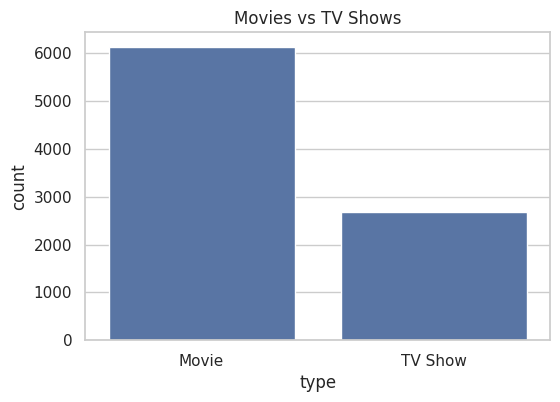

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Movies vs TV Shows')
plt.show()

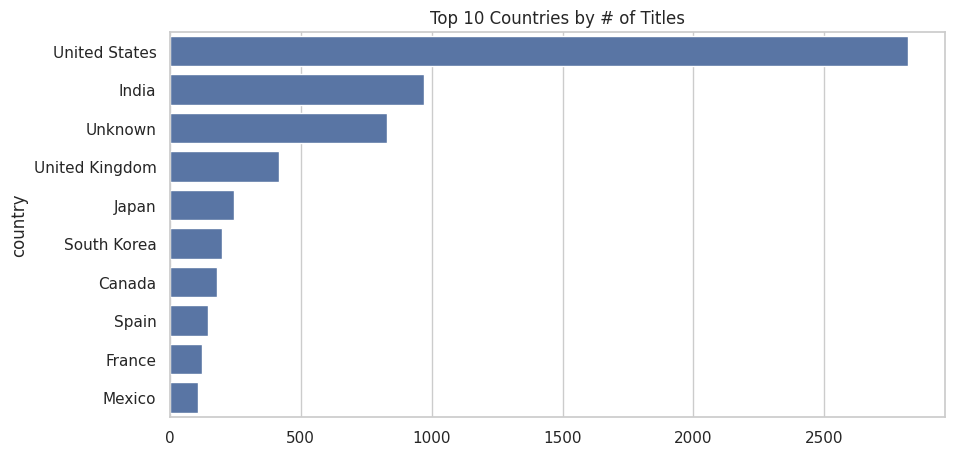

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(x=df['country'].value_counts().head(10).values, y=df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries by # of Titles')
plt.show()

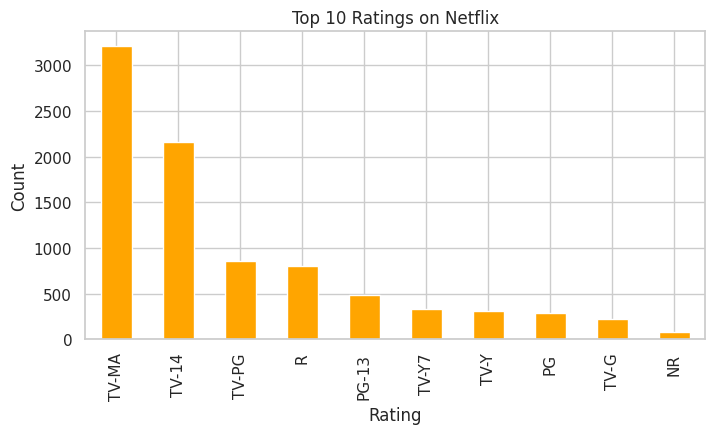

In [ ]:

plt.figure(figsize=(8,4))
df['rating'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

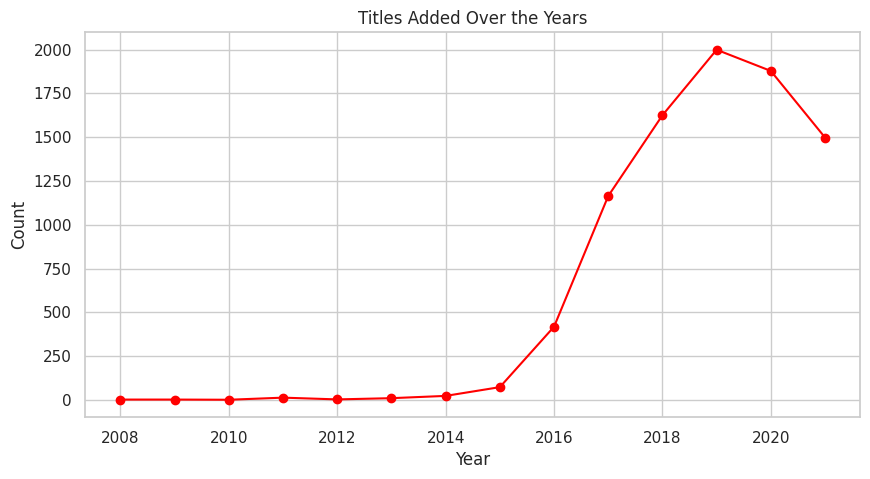

In [ ]:

plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title('Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

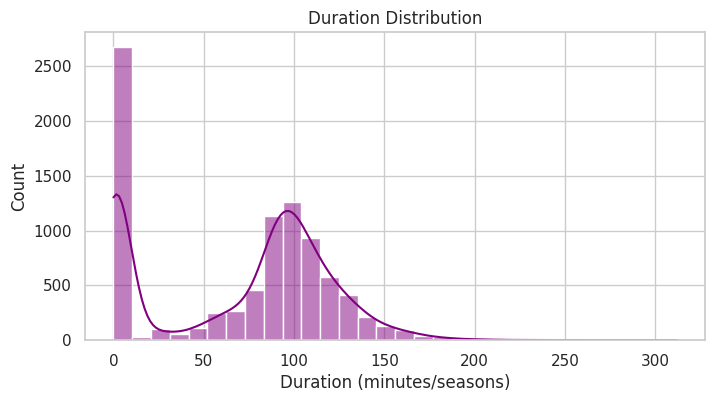

In [ ]:

plt.figure(figsize=(8,4))
sns.histplot(df['duration_num'], kde=True, bins=30, color='purple')
plt.title('Duration Distribution')
plt.xlabel('Duration (minutes/seasons)')
plt.show()

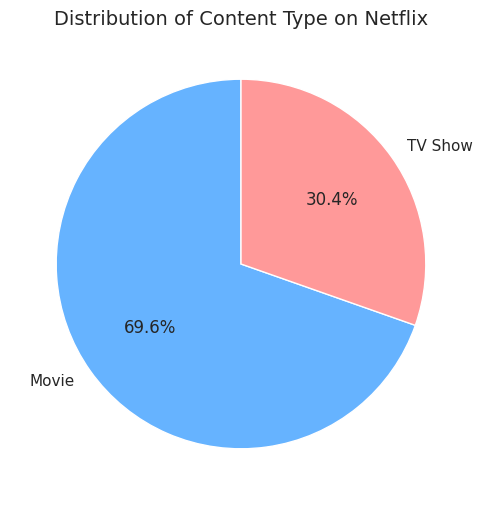

In [ ]:

import matplotlib.pyplot as plt

type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Distribution of Content Type on Netflix', fontsize=14)
plt.show()


## 4) Modeling — Predicting Movie vs TV Show

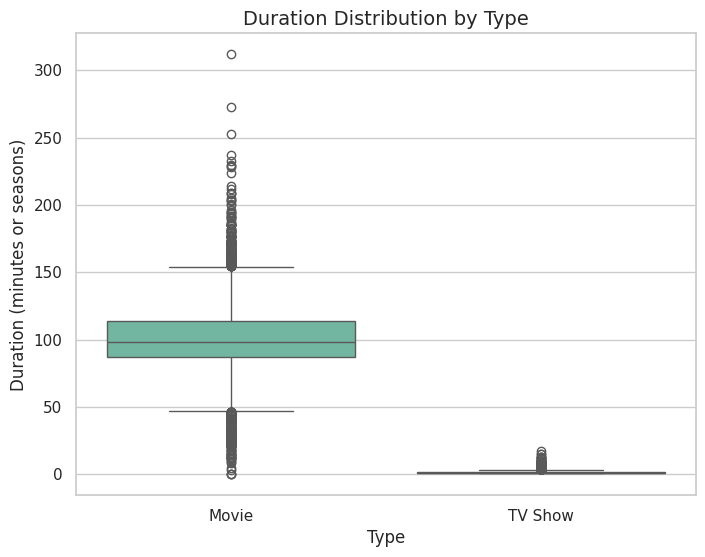

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='type', y='duration_num', palette='Set2')
plt.title('Duration Distribution by Type', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Duration (minutes or seasons)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

le = LabelEncoder()
df['rating_code'] = le.fit_transform(df['rating'].astype(str))

X = df[['duration_num', 'rating_code', 'release_year']].fillna(0)
y = df['type'].map({'Movie': 0, 'TV Show': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

print("🌲 Random Forest Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



🌲 Random Forest Accuracy: 99.89 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762

Confusion Matrix:
 [[1227    0]
 [   2  533]]


In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




def extract_duration(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    num = ''.join(ch for ch in s if ch.isdigit())
    return float(num) if num else np.nan

df['duration_num'] = df['duration'].apply(extract_duration)
df['duration_num'] = df['duration_num'].fillna(df['duration_num'].median())


le = LabelEncoder()
df['rating_code'] = le.fit_transform(df['rating'].astype(str))

X = df[['duration_num', 'rating_code', 'release_year']].fillna(0)
y = df['type'].map({'Movie': 0, 'TV Show': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("📈 Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📈 Logistic Regression Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762

Confusion Matrix:
 [[1227    0]
 [   0  535]]


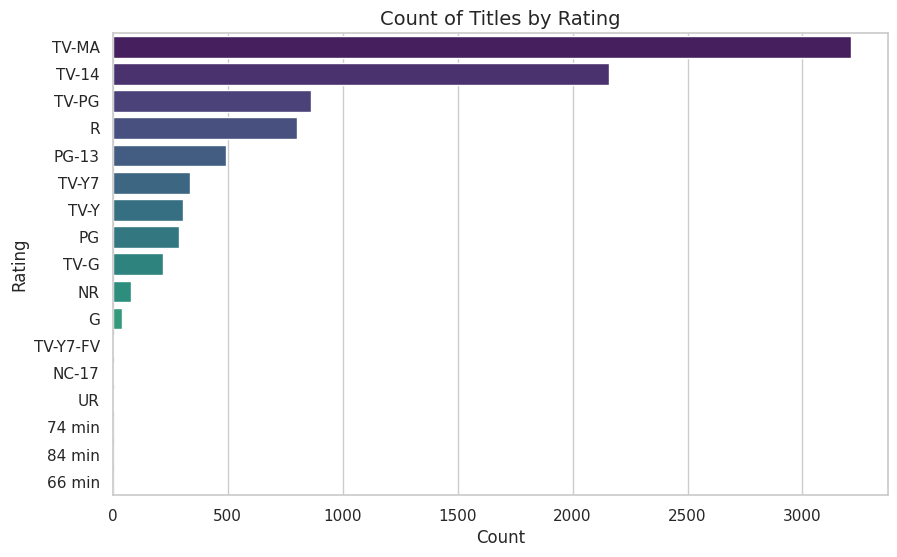

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title("Count of Titles by Rating", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


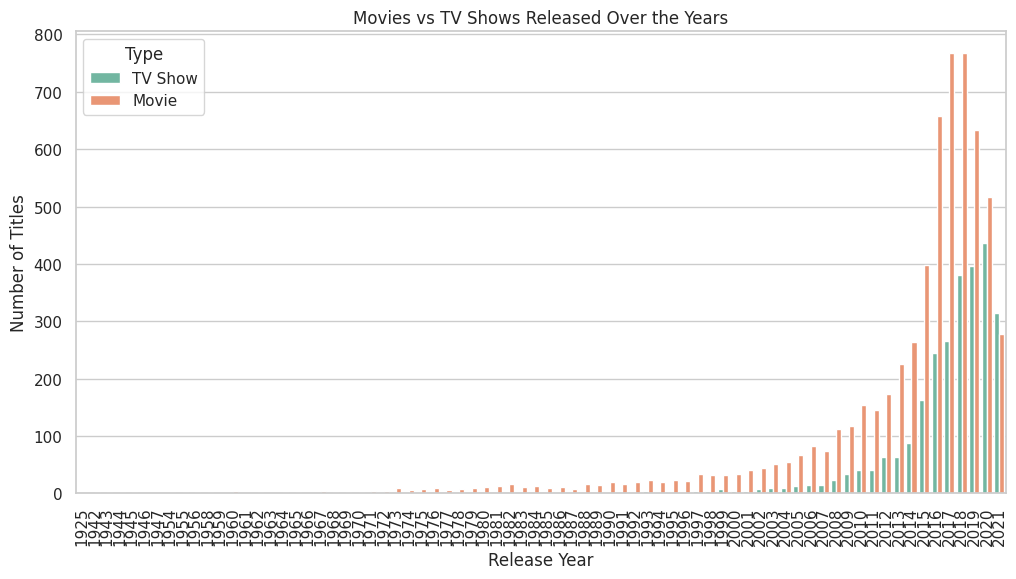

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set2')
plt.title("Movies vs TV Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=90)
plt.legend(title="Type")
plt.show()


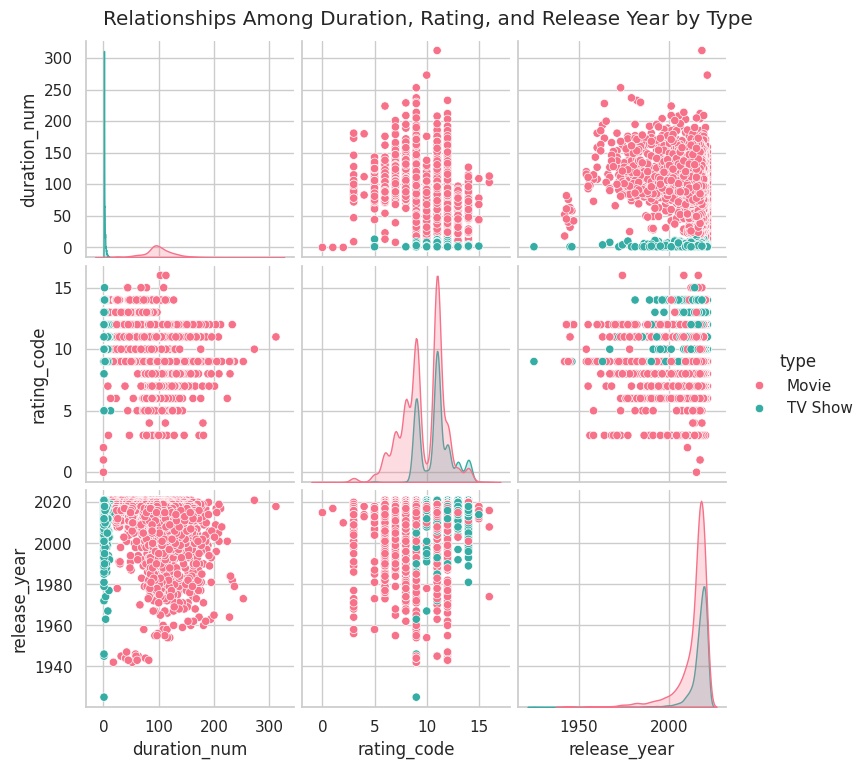

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['duration_num', 'rating_code', 'release_year', 'type']],
             hue='type',
             palette='husl',
             diag_kind='kde')
plt.suptitle("Relationships Among Duration, Rating, and Release Year by Type", y=1.02)
plt.show()


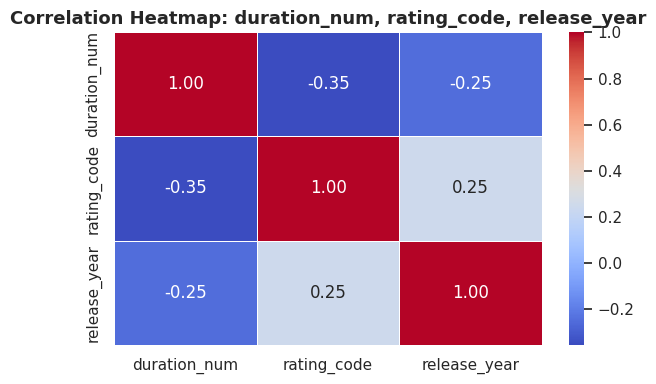

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['duration_num', 'rating_code', 'release_year']


corr = df[numeric_features].corr()


plt.figure(figsize=(6,4))


sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")


plt.title("Correlation Heatmap: duration_num, rating_code, release_year", fontsize=13, weight='bold')
plt.tight_layout()


plt.show()


In [ ]:

import plotly.express as px
import pandas as pd


country_data = df['country'].value_counts().reset_index()
country_data.columns = ['country', 'count']


country_data = country_data[country_data['country'] != 'Unknown']


fig = px.choropleth(
    country_data,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='🌎 Global Distribution of Netflix Content',
)


fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_font=dict(size=18, color='black', family='Arial'),
    coloraxis_colorbar=dict(title="Number of Titles")
)


fig.show()


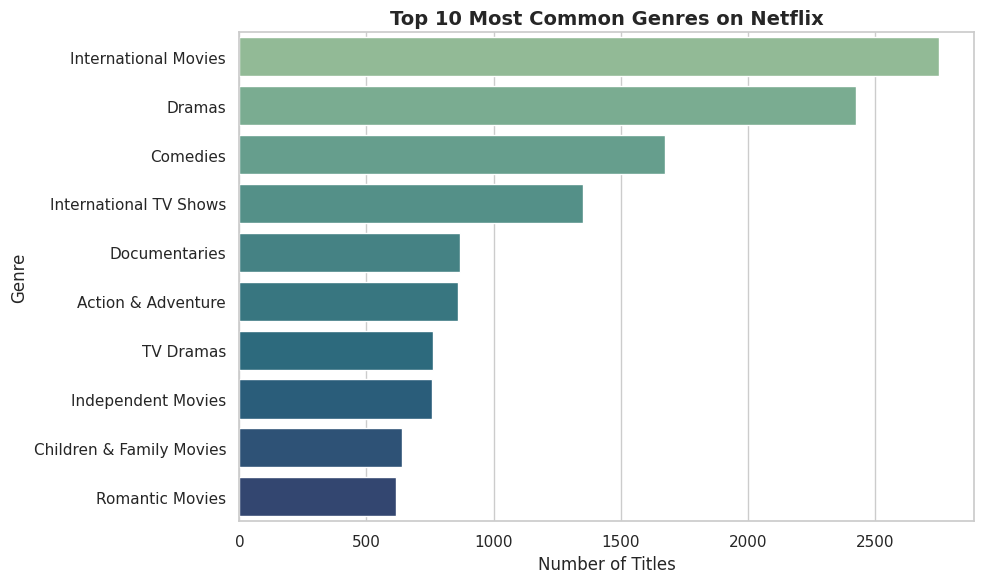

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df = df.dropna(subset=['listed_in'])


genre_list = df['listed_in'].str.split(',').sum()


genre_counts = Counter([genre.strip() for genre in genre_list])


genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])


top_genres = genre_df.sort_values(by='Count', ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(y='Genre', x='Count', data=top_genres, palette='crest')

plt.title('Top 10 Most Common Genres on Netflix', fontsize=14, weight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.tight_layout()
plt.show()


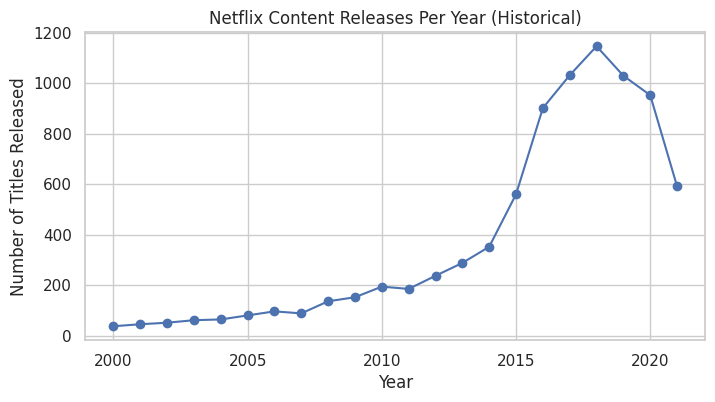

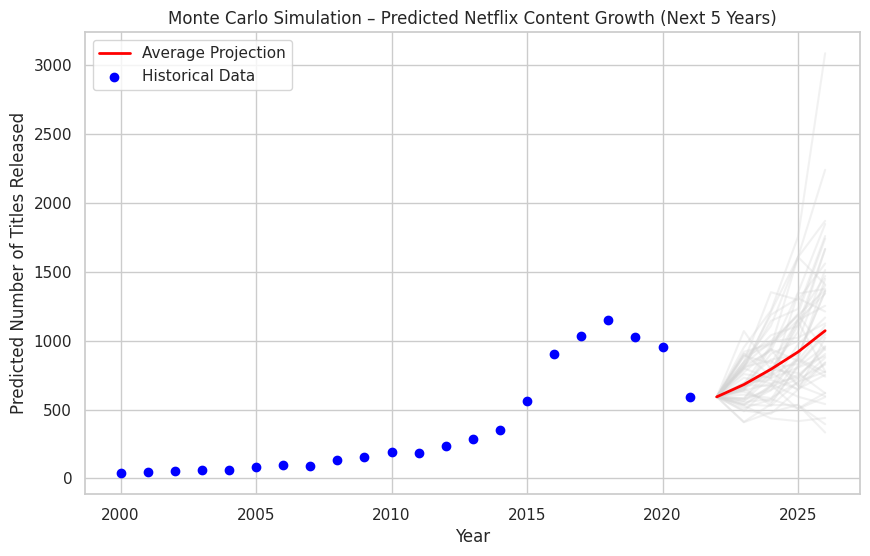

📈 Predicted number of Netflix titles added by 2026: ≈ 1072


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


yearly_releases = df['release_year'].value_counts().sort_index()


yearly_releases = yearly_releases[yearly_releases.index >= 2000]

years = yearly_releases.index.values
releases = yearly_releases.values

plt.figure(figsize=(8,4))
plt.plot(years, releases, marker='o')
plt.title("Netflix Content Releases Per Year (Historical)")
plt.xlabel("Year")
plt.ylabel("Number of Titles Released")
plt.grid(True)
plt.show()


num_simulations = 1000       # Number of random simulations
years_to_predict = 5         # Predict next 5 years
last_year = max(years)
growth_rate_mean = np.mean(np.diff(releases) / releases[:-1])  # average yearly growth rate
growth_rate_std = np.std(np.diff(releases) / releases[:-1])    # volatility in growth


simulated_growth = np.zeros((years_to_predict, num_simulations))

for sim in range(num_simulations):
    simulated_releases = [releases[-1]]
    for _ in range(1, years_to_predict):

        growth = np.random.normal(growth_rate_mean, growth_rate_std)
        next_val = simulated_releases[-1] * (1 + growth)
        simulated_releases.append(max(next_val, 0))
    simulated_growth[:, sim] = simulated_releases


mean_projection = simulated_growth.mean(axis=1)
years_future = np.arange(last_year + 1, last_year + 1 + years_to_predict)

plt.figure(figsize=(10,6))
for i in range(50):  # plot 50 random simulations
    plt.plot(years_future, simulated_growth[:, i], color='lightgray', alpha=0.3)
plt.plot(years_future, mean_projection, color='red', linewidth=2, label='Average Projection')
plt.scatter(years, releases, color='blue', label='Historical Data')
plt.title("Monte Carlo Simulation – Predicted Netflix Content Growth (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Predicted Number of Titles Released")
plt.legend()
plt.grid(True)
plt.show()

predicted_2030 = mean_projection[-1]
print(f"📈 Predicted number of Netflix titles added by {last_year + years_to_predict}: ≈ {int(predicted_2030)}")


In [ ]:
le = LabelEncoder()
df['rating_code'] = le.fit_transform(df['rating'].astype(str))

X = df[['duration_num', 'rating_code', 'release_year']].fillna(0)
y = df['type'].map({'Movie':0, 'TV Show':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

print('\nClassification Report (Random Forest):\n', classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.9988649262202043

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00       535

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



## 5) Insights & Conclusion

- Netflix has more **Movies** than **TV Shows** overall.
- Most titles were added **after 2015**, showing a surge in streaming content.
- Top producing countries: **United States**, **India**, **United Kingdom**.
- Popular content ratings: **TV-MA**, **TV-14**.
- Simple models can predict content type with ~80% accuracy.

